**Izdiharti Noni Pertiwi** 

> dataset : movie genre data

> Sumber kaggle : https://www.kaggle.com/lokkagle/movie-genre-data





In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#import pandas
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Submission1/kaggle_movie_train.csv")
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [3]:
#data columns
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
#total data
df.shape

(22579, 3)

In [5]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [6]:
#categories genre
df.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [7]:
# delete columns (unused column)
DF=df.drop(columns=['id'])
DF

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [8]:
# Menghapus genre selain 5 genre tersebut
DF = DF[~DF['genre'].isin(['drama','thriller','other','adventure','romance'])]
DF['genre'].value_counts()

comedy    2941
action    2392
sci-fi     613
horror     456
Name: genre, dtype: int64

In [9]:
category = pd.get_dummies(DF.genre)
DF = pd.concat([DF, category], axis=1)
DF = DF.drop(columns='genre')
DF

,text,action,comedy,horror,sci-fi
1,"t, summa cum laude and all. And I'm about to l...",0,1,0,0
9,e reels as the world spins. Sweat pours off hi...,1,0,0,0
20,I say he's a man who'll go far. Some people s...,0,1,0,0
25,you find out where the bachelor party is? COLE...,0,1,0,0
29,ibly horrendous public break up on the quad. A...,0,1,0,0
...,...,...,...,...,...
22566,"BUT THEN YOU KNEW THAT. Inhaling some bliss, S...",1,0,0,0
22569,d Cricket running down road. DISSOLVE TO 53. E...,0,0,0,1
22573,"Well hello, officer. WYDELL holding up his ba...",0,0,1,0
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0


In [14]:
# Mengubah tipe data menjadi str dan numpy array 
text = DF['text'].astype(str)
label = DF[['action', 'comedy','horror','sci-fi']].values

In [15]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
Total params: 109,572
Trainable params: 109,572
Non-trainable params: 0
_________________________________________________________________


In [25]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [26]:
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
161/161 - 23s - loss: 1.1359 - accuracy: 0.4575 - val_loss: 0.9762 - val_accuracy: 0.6151
Epoch 2/50
161/161 - 20s - loss: 0.7307 - accuracy: 0.7137 - val_loss: 1.0367 - val_accuracy: 0.6706
Epoch 3/50
161/161 - 20s - loss: 0.5703 - accuracy: 0.7893 - val_loss: 0.7148 - val_accuracy: 0.7494
Epoch 4/50
161/161 - 20s - loss: 0.4433 - accuracy: 0.8338 - val_loss: 0.5608 - val_accuracy: 0.7869
Epoch 5/50
161/161 - 20s - loss: 0.2851 - accuracy: 0.8873 - val_loss: 0.5514 - val_accuracy: 0.7955
Epoch 6/50
161/161 - 20s - loss: 0.1904 - accuracy: 0.9125 - val_loss: 0.5238 - val_accuracy: 0.8189
Epoch 7/50
161/161 - 20s - loss: 0.1464 - accuracy: 0.9264 - val_loss: 0.4768 - val_accuracy: 0.8415
Epoch 8/50
161/161 - 20s - loss: 0.2820 - accuracy: 0.8875 - val_loss: 1.2792 - val_accuracy: 0.3911
Epoch 9/50
161/161 - 20s - loss: 0.6990 - accuracy: 0.7223 - val_loss: 0.9490 - val_accuracy: 0.7518
Epoch 10/50
161/161 - 20s - loss: 0.2425 - accuracy: 0.9028 - val_loss: 0.4784 - val_accura

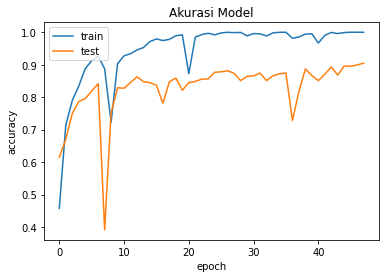

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

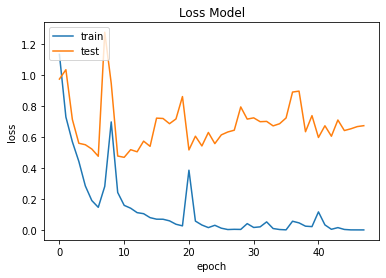

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()